In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to \"call\" them specifically.

%matplotlib inline

In [6]:
path=r'C:\Users\User\Project Covid'

In [7]:
#Importing merged data
df_merged_covid = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'covid_merged_datanew1.csv'))

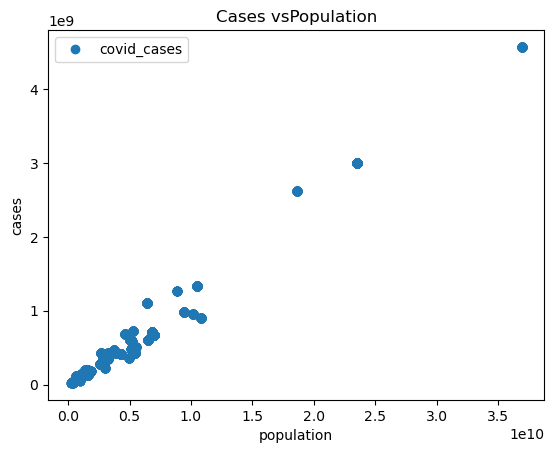

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df_merged_covid.plot(x = 'Population', y='covid_cases',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cases vsPopulation')  
plt.xlabel('population')  
plt.ylabel('cases')  
plt.show()

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_merged_covid['Population'].values.reshape(-1,1)
y = df_merged_covid['covid_cases'].values.reshape(-1,1)

In [10]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Create a regression object
   
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
y_predicted = regression.predict(X_test)

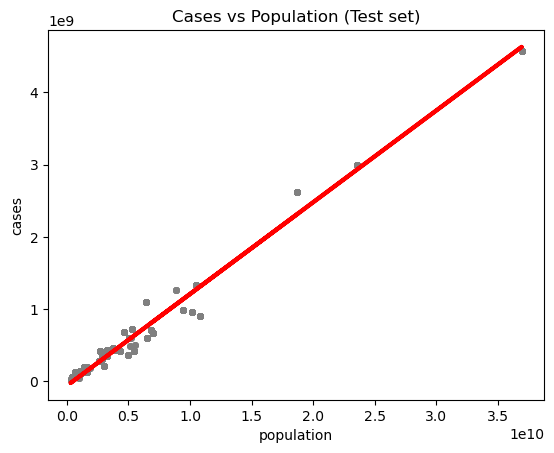

In [14]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cases vs Population (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('cases')
plot_test.show()

Linear model represented by the red regression line covers all of the data points.

In [15]:
# Create objects that contain the model summary statistics.\n",
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error\n",
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [16]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.12699392]]
Mean squared error:  1.7844232055747552e+16
R2 score:  0.9798054501824303


The positive slope indicates a positive relationship that as population rises covid cases also rises.
The R2 score values is closer to 1 which indicate a good fit.
A high MSE indicates a poor fit, indicating that the model's predictions is deviating from the actual values.

In [17]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,670604102,8.222779e+08
1,1330814819,1.274186e+09
2,670604102,8.222779e+08
3,427651902,3.531899e+08
4,1098973929,7.556892e+08
5,93477831,6.009318e+07
6,689485265,5.265154e+08
7,2999653548,2.925250e+09
8,347687993,3.502874e+08
9,56193934,-3.929764e+06


In this data there’s quite the difference between the actual and predicted y values. This just adds evidence to the fact that your model isn’t doing a great job of explaining the relationship between the “Population” and “cases” variables.